In [1]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

from collections import Counter

# Função para plots

In [2]:
def plot(imagens, color = 'gray'):
    if len(imagens) == 1:
        plt.imshow(imagens[0], color)
    else:    
        fig, ax = plt.subplots(1, len(imagens), figsize=(15, 20))
        for k, x in enumerate(imagens):        
            ax[k].imshow(x, cmap = color)
            ax[k].set_title("Imagem " + str(k))
    plt.show()

# Abrindo Imagem

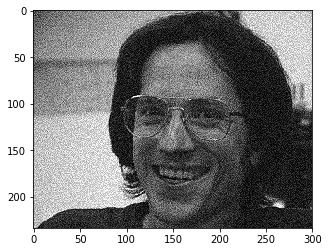

In [3]:
def img_open(x):
    return rgb2gray(imread(x))
img = img_open('main.gif') 
plot([img])

# Matrizes de Filtros

In [4]:
#filtro da mediana , encontra a mediana do valores do recorte
def make_filter(m, n):
    return np.ones((m,n)) / m*n

filters = {
    
    "mean": np.ones((3, 3)) / 9,
    
    "mean_pond": np.array((
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ))/16,
    
    "laplaciano": np.array((
        [1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]
    )),
   
    "sobel": np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    )),
    
    "gaussiano": np.array((
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    )),
}

# Tratamento das bordas

In [5]:
def resize_matrix(imagem, filtro, borda):

    x_filtro, y_filtro = filtro.shape[0] // 2, filtro.shape[1] // 2
    
    img_x, img_y       = imagem.shape
    new_matrix = np.zeros((img_x + (x_filtro * 2), img_y + (y_filtro * 2)))
    new_matrix[x_filtro: img_x + x_filtro, y_filtro: img_y + y_filtro] = imagem

    if   borda == 'ignore': return imagem, filtro.shape[0], filtro.shape[1]
    elif borda == 'zero':   return new_matrix, filtro.shape[0], filtro.shape[1]
    elif borda == 'replicar':
        
        new_matrix[:x_filtro,:]      =  new_matrix[x_filtro,:]          #cima
        new_matrix[img_x + 1:, :]    =  new_matrix[img_x, :]            #baixo
        new_matrix[:,0]              =  new_matrix[:,y_filtro]          #esquerda
        new_matrix[:,img_y + 1]      =  new_matrix[:,img_y]             #direita
        
        return new_matrix, filtro.shape[0], filtro.shape[1]
    
    elif borda == 'espelhar':
        #img[::-1]
        pass
    else: pass

# Algoritmo convolution

In [6]:
def convolution(img, filtro, borda = 'ignore'):
    
    img_out, x_origin, y_origin =  resize_matrix(img, filtro, borda)
    matrix_img_out = np.zeros(img.shape)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            try: #Try Except para ignorar tratamento de bordas
                matrix_img_out[x, y] = sum(
                    sum(filtro * img_out[x: x + x_origin, y: y + y_origin])
                )
            except: continue
    return matrix_img_out

# Exemplo dos Filtros

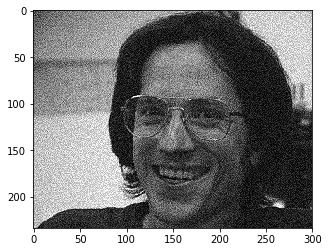

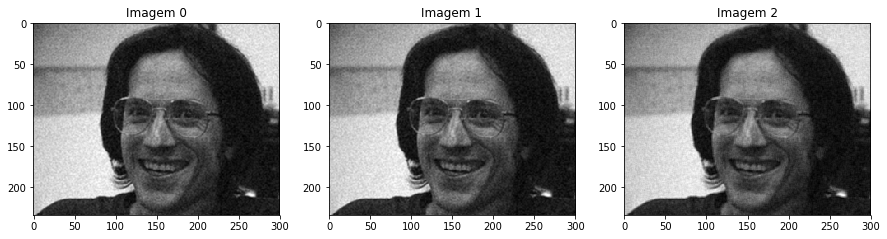

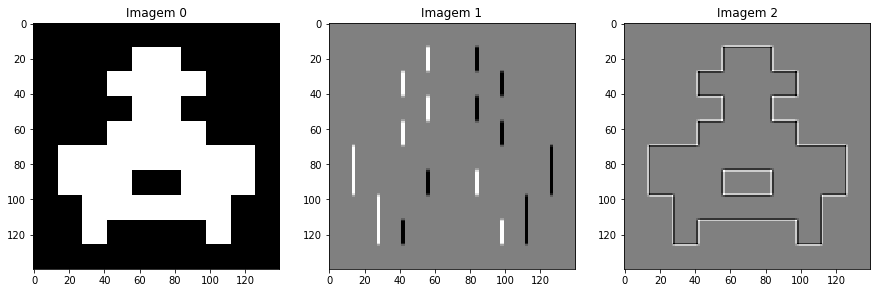

In [9]:
img_borda = img_open('main.png')

k = convolution(img, filters['gaussiano'],  'replicar')
w = convolution(img, filters['mean_pond'],     'replicar')
x = convolution(img, filters['mean'],       'replicar')

y = convolution(img_borda, filters['sobel'],      'replicar')
z = convolution(img_borda, filters['laplaciano'], 'replicar')

plot([img])
plot([k, w, x])
plot([img_borda, y, z])

# Bordas - Laplaciano

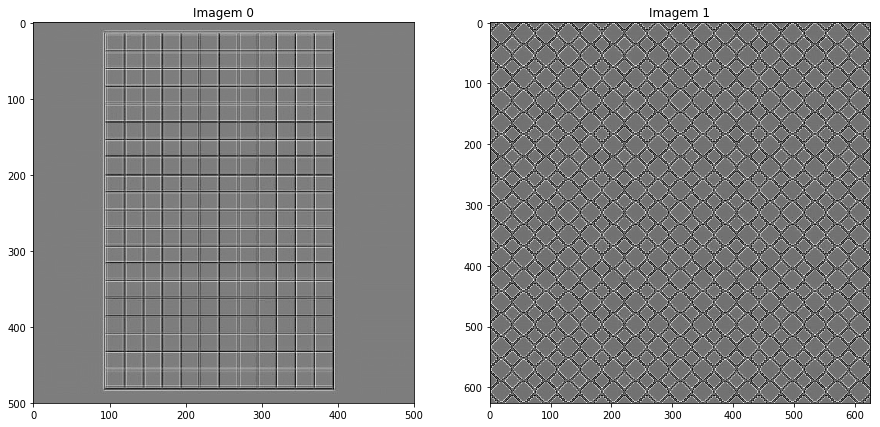

In [10]:
d = convolution(img_open('main.jpg'), filters['laplaciano'] * -1, 'replicar')
h = convolution(img_open('g.jpg'), filters['laplaciano'] * -1, 'replicar')

plot([d, h])

# Filtragem high-boost

In [11]:
def high_boost(VAR, img, filtro, borda):
    mask = img - convolution(img, filtro, borda)
    return [mask, (mask) * VAR + img]

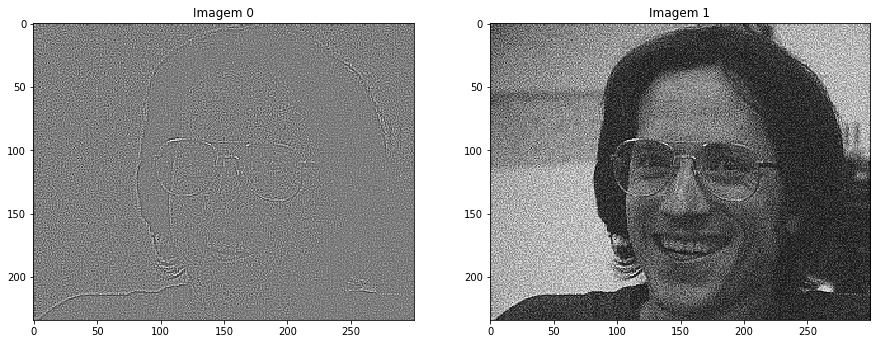

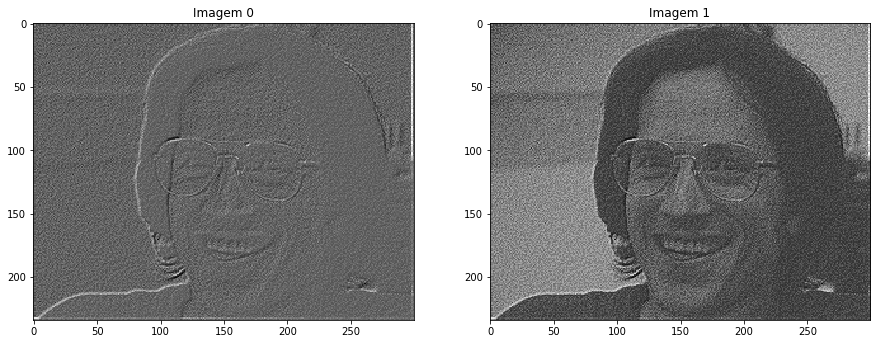

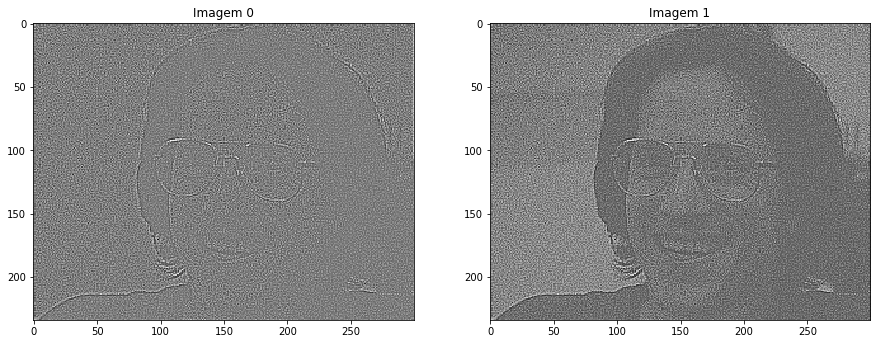

In [12]:
hb1 = high_boost(0.4, img, filters['mean'], 'replicar')
hb2 = high_boost(1  , img, filters['mean'], 'ignore')
hb3 = high_boost(5  , img, filters['mean'], 'zero')
plot(hb1)
plot(hb2)
plot(hb3)